# Logistic Regression for 2 features(updated)

Added Feature Normalization.
Decreased Iterations 100000>>>10000
Increased Learning Rate 0.001<<0.01
@ makes algorithim 100 times faster
For more info about Standardization and Normalization, visit https://www.youtube.com/watch?v=mnKm3YP56PY

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
theta_final=np.zeros(3)
zero_hist=[]
J_hist=[]

In [2]:
def getData():
    data=pd.read_csv('C:/Users/Kartikeya/Desktop/machine_learning/ex2data.csv')
    X1=np.array([data['X1']])
    X2=np.array([data['X2']])
    X=np.array(data.iloc[:,0:2])
    y=np.array([data['y']])
    return [X1,X2,y]
#ideally X1 and X2 should be sent as one matrix of X
#use data.iloc for this
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
#ideally data is to be loaded from CSV
#keeping it simple for now

In [3]:
def featureScaleNorm(X1,X2):
    #standardizes the arrays using formula X=(X-min(X))/(max(X)-min(X))
    X1=(X1-np.amin(X1))/(np.amax(X1)-np.amin(X1))
    X2=(X2-np.amin(X2))/(np.amax(X2)-np.amin(X2))
    return [X1,X2]

In [4]:
def plotDataPoints(X1,X2,y):
    t=np.where(y==1)#returns array of indices
    f=np.where(y==0)
    plt.figure(figsize=(13,8))
    p1=plt.scatter(X1[t],X2[t])#using feature to plot only data points corresponding to y==1
    p2=plt.scatter(X1[f],X2[f],color='r',marker='x')#y==0
    plt.grid(True)
    plt.legend((p1,p2),("Selected","Not Selected"))
    plt.xlabel("Score of Semester 1")
    plt.ylabel("Score of Semester 2")
    plt.title("Students selected for interview")

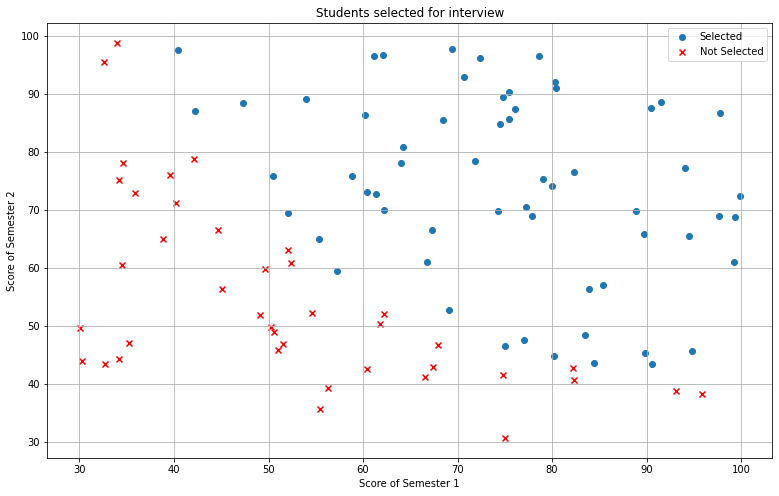

In [5]:
[X1,X2,y]=getData()
plotDataPoints(X1,X2,y)


In [6]:
def plotDecisionBoundary(X1,X2,y,theta):
    
    plotDataPoints(X1,X2,y)
    
    slope=theta[1]/theta[2]*(-1)
    intercept=theta[0]/theta[2]*(-1)
    xaxis=np.array([np.amin(X1),np.amax(X1)])
    yaxis=(slope*xaxis+intercept)
    plt.plot(xaxis,yaxis,color='g')

In [7]:
def costFunction(X1,X2,y,theta):
    m=X1.size
    hx=sigmoid(X1,X2,theta) #this is to calculate cost of the function 
    J=np.sum((-1)*y*np.log(hx)-(1-y)*np.log(1-hx))
    J=J/m
    J_hist.append(J)
    #---------------------------------------------
    X0=np.ones((1,m))# calculating gradient
    grad=np.array([np.sum(X0*(hx-y)),np.sum(X1*(hx-y)),np.sum(X2*(hx-y))])
    grad=grad/m
    return grad

In [8]:
def sigmoid(X1,X2,theta):
    hx=theta[0]+theta[1]*X1+theta[2]*X2
    hx=1/(1+np.exp(-hx))
    return hx.astype(float)

In [9]:
def updateTheta(theta,max_iter,alpha):
    for iter in range(max_iter):
        theta=theta-alpha*costFunction(X1,X2,y,theta)
    return theta

In [10]:
[X1,X2,y]=getData()
[X1,X2]=featureScaleNorm(X1,X2)
X1=np.array(X1)
X2=np.array(X2)


In [11]:
[X1,X2,y]

[array([[0.0653576 , 0.00329655, 0.08298696, 0.43170417, 0.7018776 ,
         0.21527877, 0.44503368, 0.64440304, 0.65988247, 0.77927476,
         0.94309875, 0.64425971, 0.74888921, 0.56327935, 0.13587502,
         0.34269743, 0.55912283, 0.54307009, 0.581912  , 0.67249534,
         0.53475706, 0.854522  , 0.29339258, 0.05948115, 0.68596818,
         0.46165974, 0.71850365, 0.90368353, 0.4553533 , 0.12512541,
         0.44890354, 0.79317758, 0.31603841, 0.31517844, 0.14590798,
         0.35230042, 0.05532464, 0.4890354 , 0.64110649, 0.05905117,
         0.77167837, 0.30801204, 0.92274617, 0.74974918, 0.30084564,
         0.4609431 , 0.67550523, 0.97047442, 0.45879318, 0.88146768,
         0.71492045, 0.99197363, 0.86699154, 0.06392432, 0.2899527 ,
         0.27991974, 0.96875448, 0.03611868, 0.63336678, 0.5982514 ,
         0.64984951, 0.07496058, 0.37537624, 0.        , 0.20940232,
         0.52314748, 0.1490612 , 0.27246668, 0.71979361, 0.52587072,
         0.03812527, 0.48702881, 0

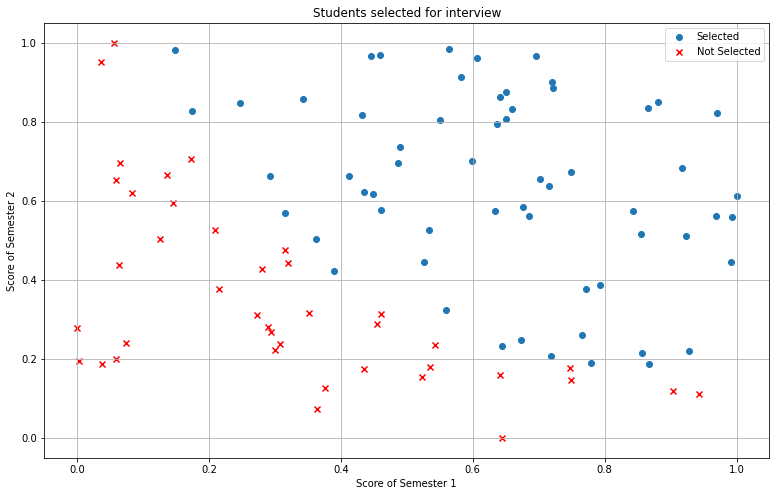

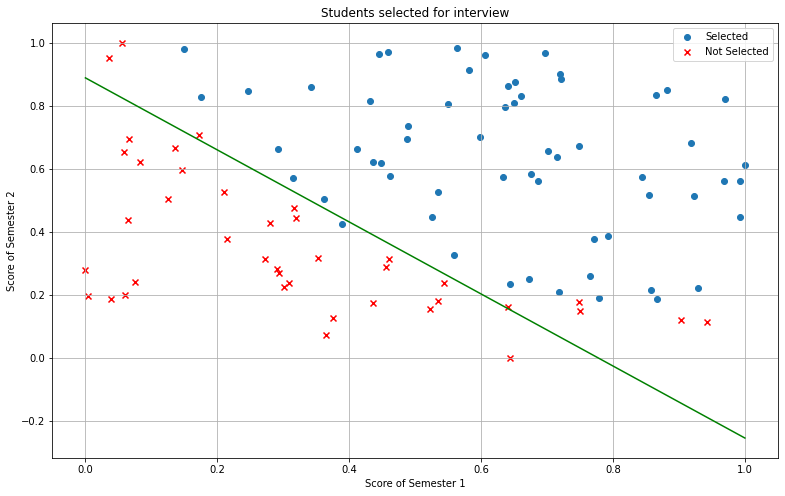

In [15]:
plotDataPoints(X1,X2,y)
theta=np.zeros(3)
max_iter=10000
alpha=0.01
theta_final=updateTheta(theta,max_iter,alpha)
plotDecisionBoundary(X1,X2,y,theta_final)

In [13]:
theta_final

array([-0.07077785,  0.67489119,  0.58493651])